In [1]:
import os
from PIL import Image
from sahi.model import MmdetDetectionModel
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.utils.cv import visualize_object_predictions
import numpy as np
import pickle
from collections import defaultdict
import pandas as pd

/vol/bitbucket/jrb21/anaconda3/envs/sodb/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load the model

In [2]:
detection_model = MmdetDetectionModel(
    model_path= "models-to-test/latest.pth",
    config_path= "mmdet_configs/xview_tood/tood_crop_300_500_cls_cars_trucks_1e-3_new_pipe.py",
    device='cuda' # or 'cpu'
)

load checkpoint from local path: models-to-test/latest.pth


### Run inference on a single image

In [3]:
test_img_path = "WV3/out_red.tiff"
width, height = (400,400)

sliced_pred_result = get_sliced_prediction(
    test_img_path,
    detection_model, 
    slice_width=width, 
    slice_height=height
)

Performing prediction on 115 number of slices.


In [4]:
sliced_pred_result.object_prediction_list

[ObjectPrediction<
     bbox: BoundingBox: <(666, 6302, 676, 6319), w: 10, h: 17>,
     mask: None,
     score: PredictionScore: <value: 0.5692824721336365>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(680, 6687, 689, 6702), w: 9, h: 15>,
     mask: None,
     score: PredictionScore: <value: 0.5174318552017212>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(649, 3191, 658, 3207), w: 9, h: 16>,
     mask: None,
     score: PredictionScore: <value: 0.5075268149375916>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(505, 4882, 515, 4898), w: 10, h: 16>,
     mask: None,
     score: PredictionScore: <value: 0.5052633881568909>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(489, 5068, 498, 5085), w: 9, h: 17>,
     mask: None,
     score: PredictionScore: <value: 0.500849723815918>,
     c

### Batch prediction

In [4]:
MODEL_PATH = "models-to-test/latest.pth"
MODEL_CONFIG_PATH = config_path= "mmdet_configs/xview_tood/tood_crop_300_500_cls_cars_trucks_1e-3_new_pipe.py"
EVAL_IMAGES_FOLDER_DIR = "WV3"
EXPORT_VISUAL = True

INFERENCE_SETTING_TO_PARAMS = {
    "XVIEW_SAHI": {
        "no_standard_prediction": True,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0,
    },
    "XVIEW_SAHI_PO": {
        "no_standard_prediction": True,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0.20,
    },
    "XVIEW_SAHI_FI": {
        "no_standard_prediction": False,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0,
    },
    "XVIEW_SAHI_FI_PO": {
        "no_standard_prediction": False,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0.20,
    },
}

# Of the above 4 options I want to slice and not do full image size inference
INFERENCE_SETTING = "XVIEW_SAHI_PO"
setting_params = INFERENCE_SETTING_TO_PARAMS[INFERENCE_SETTING]

# From the evaluation py file I delete the eval dataset path and change the confidence to 0.3
result = predict(
    model_type="mmdet",
    model_path=MODEL_PATH,
    model_config_path=MODEL_CONFIG_PATH,
    model_confidence_threshold=0.2,
    model_device="cuda:0",
    model_category_mapping=None,
    model_category_remapping=None,
    source=EVAL_IMAGES_FOLDER_DIR,
    no_standard_prediction=setting_params["no_standard_prediction"],
    no_sliced_prediction=setting_params["no_sliced_prediction"],
    image_size=None,
    slice_height=setting_params["slice_size"],
    slice_width=setting_params["slice_size"],
    overlap_height_ratio=setting_params["overlap_ratio"],
    overlap_width_ratio=setting_params["overlap_ratio"],
    postprocess_type="GREEDYNMM",
    postprocess_match_metric="IOS",
    postprocess_match_threshold=0.5,
    postprocess_class_agnostic=True,
    novisual=not EXPORT_VISUAL,
    project="runs/highways",
    name=INFERENCE_SETTING,
    visual_bbox_thickness=1,
    visual_text_size=0.3,
    visual_text_thickness=1,
    visual_export_format="png",
    verbose=0,
    return_dict=True,
    force_postprocess_type=True,
    export_pickle = True,
)

load checkpoint from local path: models-to-test/latest.pth


Performing inference on images:   0%|                                                                                                 | 0/4 [00:00<?, ?it/s]/vol/bitbucket/jrb21/anaconda3/envs/sodb/lib/python3.8/site-packages/sahi/postprocess/utils.py:145: RuntimeWarning: invalid value encountered in long_scalars
  return intersect / smaller_area
Performing inference on images:   0%|                                                                                                 | 0/4 [00:05<?, ?it/s]

Prediction time is: 5466.97 ms


Performing inference on images:  25%|██████████████████████▎                                                                  | 1/4 [00:25<00:17,  5.79s/it]

Prediction time is: 19958.99 ms


Performing inference on images:  50%|████████████████████████████████████████████▌                                            | 2/4 [00:34<00:29, 14.65s/it]

Prediction time is: 7366.42 ms


Performing inference on images:  75%|██████████████████████████████████████████████████████████████████▊                      | 3/4 [00:50<00:11, 11.45s/it]

Prediction time is: 16112.48 ms


Performing inference on images: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:50<00:00, 12.72s/it]

Prediction results are successfully exported to runs/highways/XVIEW_SAHI_PO11


### Process inference results

In [359]:
detections = pd.DataFrame(
   {
       "Road": [],
       "Small Car": [],
       "Bus": [],
       "Pickup Truck": [],
       "Utility Truck": [],
       "Truck": [],
       "Cargo Truck": [],
       "Truck w/Box": [],
       "Truck Tractor": [],
       "Trailer": [],
       "Truck w/Flatbed": [],
       "Truck w/Liquid": [],
       
   }
)

pickle_folder = 'runs/highways/XVIEW_SAHI_PO11/pickles'
prediction_lists = defaultdict()

for i, file in enumerate(os.listdir(pickle_folder)):
    with (open(os.path.join(pickle_folder, file), "rb")) as f:
        prediction_list = pickle.load(f)

    road = file.split('.')[0]
    prediction_lists[road] = prediction_list
    counts = defaultdict(int)
    for pred in prediction_list:
        counts[pred.category.name] +=1
            
        detections.loc[i] = [road, 
                 counts["Small Car"],
                 counts["Bus"],
                 counts["Pickup Truck"],
                 counts["Utility Truck"],
                 counts["Truck"],
                 counts["Cargo Truck"],
                 counts["Truck w/Box"],
                 counts["Truck Tractor"],
                 counts["Trailer"],
                 counts["Truck w/Flatbed"],
                 counts["Truck w/Liquid"]
                ]

In [360]:
detections

,Road,Small Car,Bus,Pickup Truck,Utility Truck,Truck,Cargo Truck,Truck w/Box,Truck Tractor,Trailer,Truck w/Flatbed,Truck w/Liquid
0,A45,27,2,0,0,9,0,3,0,1,0,0
1,M6,38,2,0,0,13,0,6,0,1,0,0
2,M42,104,15,0,0,18,6,16,0,0,0,0
3,A452,22,0,0,0,2,0,1,0,0,0,0


### Convert Detections into 15 minute counts

In [361]:
detections.loc[:,'all'] = detections.sum(axis=1)

/tmp/ipykernel_272305/1439541957.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  detections.loc[:,'all'] = detections.sum(axis=1)


In [362]:
detections.loc[:, 'length_m'] = [4559.31, 5549.01, 7347.07, 2542.41]

In [365]:
detections.columns = ['road',
 'small_car_detections',
 'bus_detections',
 'pickup_truck_detections',
 'utility_truck_detections',
 'truck_detections',
 'cargo_truck_detections',
 'truck_w_box_detections',
 'truck_tractor_detections',
 'trailer_detections',
 'truck_w_flatbed_detections',
 'truck_w_liquid_detections',
 'all_detections',
 'length_m']

In [367]:
detections['length_milles'] = detections.length_m.apply(lambda x: x/1000 *5/8)

In [368]:
detections

,road,small_car_detections,bus_detections,pickup_truck_detections,utility_truck_detections,truck_detections,cargo_truck_detections,truck_w_box_detections,truck_tractor_detections,trailer_detections,truck_w_flatbed_detections,truck_w_liquid_detections,all_detections,length_m,length_milles
0,A45,27,2,0,0,9,0,3,0,1,0,0,42,4559.31,2.849569
1,M6,38,2,0,0,13,0,6,0,1,0,0,60,5549.01,3.468131
2,M42,104,15,0,0,18,6,16,0,0,0,0,159,7347.07,4.591919
3,A452,22,0,0,0,2,0,1,0,0,0,0,25,2542.41,1.589006


In [369]:
train_report_volumes = clean_train_report_df[['site_name','site_id','report_date','time_period_ending','time_interval','0-520cm','521-660cm','661-1160cm','1160+cm','avg_mph','total_volume','timestamp']]
train_report_volumes.loc[:,'road'] = train_report_volumes.site_id.apply(
    lambda x: 'M6' if x in M6_sites
    else 'A45' if x in A45_sites
    else 'A452' if x in A452_sites
    else 'M42' if x in M42_sites
    else '' )

train_report_volumes = train_report_volumes.loc[train_report_volumes.road != '']
train_report_volumes = train_report_volumes.loc[(train_report_volumes.timestamp.dt.year==2021) &
                         (train_report_volumes.timestamp.dt.month==6) & 
                         (train_report_volumes.timestamp.dt.day==15) &
                          (train_report_volumes.timestamp.dt.hour==11) &
                          (train_report_volumes.time_interval == '44')]

train_report_volumes.avg_mph = train_report_volumes.avg_mph.astype(int)

roads_gorund_truth = train_report_volumes.groupby('road').agg({'0-520cm' : 'sum', '521-660cm' : 'sum', '661-1160cm' : 'sum', '1160+cm' : 'sum', 'total_volume' : 'sum', 'avg_mph' : 'mean' })

/tmp/ipykernel_272305/4097689890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_report_volumes.loc[:,'road'] = train_report_volumes.site_id.apply(


In [370]:
roads_gorund_truth

,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph
road,,,,,,
A45,395,28,66,35,524,54.0
A452,321,44,46,22,433,53.5
M42,916,321,247,337,1821,60.0
M6,719,90,86,191,1086,60.0


In [371]:
pd.set_option('display.max_columns', None)

In [409]:
full_table = pd.merge(detections, roads_gorund_truth, on='road',how='left')

In [410]:
full_table['time_to_cross_hour'] = full_table.apply(lambda x : x.length_milles/x.avg_mph * 1/2 , axis=1) # add in half since length counts both sides of the road
full_table['time_to_cross_min'] = full_table.apply(lambda x : x.time_to_cross_hour * 60 , axis=1)

In [411]:
 detection_cols = ['small_car_detections',
 'bus_detections',
 'pickup_truck_detections',
 'utility_truck_detections',
 'truck_detections',
 'cargo_truck_detections',
 'truck_w_box_detections',
 'truck_tractor_detections',
 'trailer_detections',
 'truck_w_flatbed_detections',
 'truck_w_liquid_detections',
 'all_detections']

In [412]:
for col in detection_cols:
    pred_col = col.replace('detections', 'pred')
    full_table[pred_col] = full_table[col] * 15 / full_table['time_to_cross_min']

In [413]:
full_table

,road,small_car_detections,bus_detections,pickup_truck_detections,utility_truck_detections,truck_detections,cargo_truck_detections,truck_w_box_detections,truck_tractor_detections,trailer_detections,truck_w_flatbed_detections,truck_w_liquid_detections,all_detections,length_m,length_milles,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph,time_to_cross_hour,time_to_cross_min,small_car_pred,bus_pred,pickup_truck_pred,utility_truck_pred,truck_pred,cargo_truck_pred,truck_w_box_pred,truck_tractor_pred,trailer_pred,truck_w_flatbed_pred,truck_w_liquid_pred,all_pred
0,A45,27,2,0,0,9,0,3,0,1,0,0,42,4559.31,2.849569,395,28,66,35,524,54.0,0.026385,1.583094,255.828185,18.950236,0.0,0.0,85.276062,0.0000,28.425354,0.0,9.475118,0.0,0.0,397.954954
1,M6,38,2,0,0,13,0,6,0,1,0,0,60,5549.01,3.468131,719,90,86,191,1086,60.0,0.028901,1.734066,328.707283,17.300383,0.0,0.0,112.452492,0.0000,51.901150,0.0,8.650192,0.0,0.0,519.011499
2,M42,104,15,0,0,18,6,16,0,0,0,0,159,7347.07,4.591919,916,321,247,337,1821,60.0,0.038266,2.295959,679.454531,97.998250,0.0,0.0,117.597900,39.1993,104.531466,0.0,0.000000,0.0,0.0,1038.781446
3,A452,22,0,0,0,2,0,1,0,0,0,0,25,2542.41,1.589006,321,44,46,22,433,53.5,0.014851,0.891032,370.357259,0.000000,0.0,0.0,33.668842,0.0000,16.834421,0.0,0.000000,0.0,0.0,420.860522


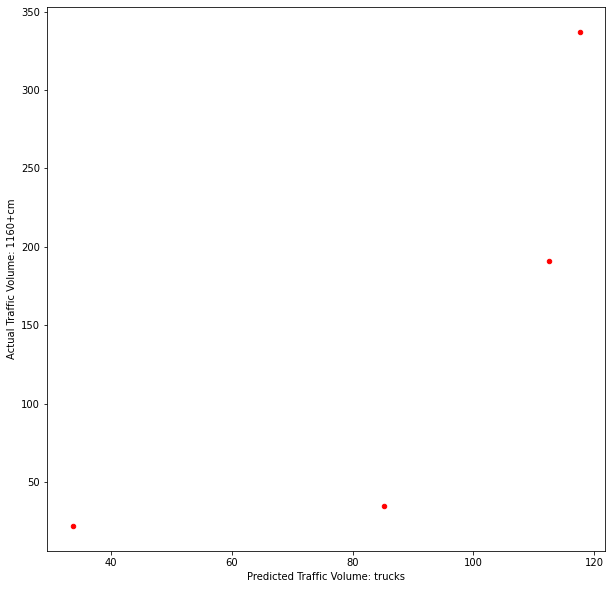

In [472]:
fig, ax = plt.subplots(figsize=(10,10))
full_table.plot('truck_pred','1160+cm', c='red', kind='scatter', ax=ax)
ax.set_xlabel('Predicted Traffic Volume: trucks')
ax.set_ylabel('Actual Traffic Volume: 1160+cm')
plt.show()

In [460]:
X = np.array(full_table['all_pred']).reshape(-1,1)
y = np.array(full_table['total_volume']).reshape(-1,1)
theta = np.linalg.inv(X.T @ X) @ y.T @ X
theta = theta[0][0]

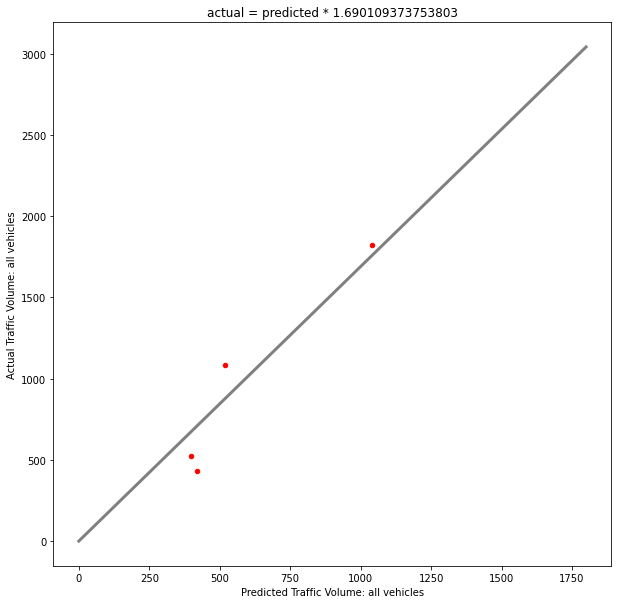

In [464]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0,1800],[0,1800*theta], lw=3, c='grey')
full_table.plot('all_pred','total_volume', c='red', kind='scatter', ax=ax)
ax.set_xlabel('Predicted Traffic Volume: all vehicles')
ax.set_ylabel('Actual Traffic Volume: all vehicles')
ax.set_title(label=f"actual = predicted * {theta}")
plt.show()

### View raw count data for comparison

In [238]:
clean_train_report_df = pd.read_feather('/vol/bitbucket/jrb21/project/Highways/clean_train_report_df.feather')

In [239]:
M42_sites_southbound = ['10560', '10337']
M42_sites_northbound = ['10398']
M42_sites  = M42_sites_northbound + M42_sites_southbound

clean_train_report_df.loc[(clean_train_report_df.timestamp.dt.year==2021) &
                         (clean_train_report_df.timestamp.dt.month==6) & 
                         (clean_train_report_df.timestamp.dt.day==15) &
                          (clean_train_report_df.timestamp.dt.hour==11) &
                          (clean_train_report_df.time_interval == '44') &
                         (clean_train_report_df.site_id.isin(M42_sites))]

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
571869,M42/6450M,10337,2021-06-15T00:00:00,11:14:00,44,45,30,27,26,58,128,2021-06-15 11:14:00,11,1,6,1.379382,1.855742,2.379946,1.296117,1.595956
654908,M42/6438A,10398,2021-06-15T00:00:00,11:14:00,44,438,139,136,188,59,901,2021-06-15 11:14:00,11,1,6,1.020019,1.552031,1.965836,2.012578,1.321995
746372,M42/6450B,10560,2021-06-15T00:00:00,11:14:00,44,433,152,84,123,63,792,2021-06-15 11:14:00,11,1,6,1.074513,1.440301,1.544554,1.677316,1.244855


In [214]:
road_len_m = 7347.07/2 
road_len_km = road_len_m/1000
road_len_miles = 5/8 * road_len_km

avg_speed_mph = 60

# time = distance/speed
time_to_cross_hours = road_len_miles/avg_speed_mph

time_to_cross_min = time_to_cross_hours * 60

time_to_cross_min

2.295959375

In [175]:
len(prediction_lists['M42']) * 15/time_to_cross_min

1038.7814462091692

### Mess

In [243]:
M42_sites = ['10560', '10337', '10398']
A452_sites = ['9092', '9093']
M6_sites = ['18212', '18227']
A45_sites = ['9490', '9491']

sites = pd.read_feather('/vol/bitbucket/jrb21/project/Highways/train_sites_df')
sites.loc[:,'direction'] = sites.Name.apply(lambda x : x.split(' ')[-1])

sites.loc[:,'road'] = sites.Id.apply(
    lambda x: 'M6' if x in M6_sites
    else 'A45' if x in A45_sites
    else 'A452' if x in A452_sites
    else 'M42' if x in M42_sites
    else '' )

sites[sites.road != '']

,Id,Name,Description,Longitude,Latitude,Status,direction,road
15,9092,TMU Site 7642/1 on A452 northbound between A45...,7642/1,-1.691470,52.449594,Active,Northbound,A452
16,9093,TMU Site 7642/2 on A452 southbound between A44...,7642/2,-1.691249,52.449683,Active,Southbound,A452
17,9490,TMU Site 7132/1 on A45 eastbound between M42 a...,7132/1,-1.701929,52.445674,Active,Eastbound,A45
18,9491,TMU Site 7133/1 on A45 westbound between A452 ...,7133/1,-1.696631,52.445795,Active,Westbound,A45
19,10337,MIDAS site at M42/6450M priority 1 on link 112...,M42/6450M,-1.710256,52.468125,Active,Southbound,M42
22,10398,MIDAS site at M42/6438A priority 1 on link 199...,M42/6438A,-1.710605,52.457571,Active,Northbound,M42
25,10560,MIDAS site at M42/6450B priority 1 on link 112...,M42/6450B,-1.710299,52.468323,Active,Southbound,M42
43,18212,MIDAS site at M6/5690A priority 1 on link 1110...,M6/5690A,-1.686682,52.477379,Active,Northbound,M6
46,18227,MIDAS site at M6/5686B priority 1 on link 1261...,M6/5686B,-1.680658,52.477642,Active,Southbound,M6


In [316]:
train_report_volumes.groupby('road').agg({'0-520cm' : 'sum', '521-660cm' : 'sum', '661-1160cm' : 'sum', '1160+cm' : 'sum', 'total_volume' : 'sum', 'avg_mph' : 'mean' })

,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph
road,,,,,,
A45,395,28,66,35,524,54.0
A452,321,44,46,22,433,53.5
M42,916,321,247,337,1821,60.0
M6,719,90,86,191,1086,60.0


In [276]:
for index, row in detections.iterrows():
    
    # Get the road length in miles
    length_m = row.length/2
    length_km = length_m/1000
    length_miles = length_km * 5/8
    
    # Get the everage road speed in mph
    # Get the site ids for this road and take the mean of their average mph speeds
    site_ids = list(sites[sites.road==row.Road].Id)
    
    ground_truth_table = clean_train_report_df.loc[(clean_train_report_df.timestamp.dt.year==2021) &
                         (clean_train_report_df.timestamp.dt.month==6) & 
                         (clean_train_report_df.timestamp.dt.day==15) &
                          (clean_train_report_df.timestamp.dt.hour==11) &
                          (clean_train_report_df.time_interval == '44') &
                         (clean_train_report_df.site_id.isin(site_ids))]
    
    mean_speed_mph = ground_truth_table.avg_mph.astype(int).mean()
    
    # Get the time to cross the image by dividing length by speed
    time_to_cross_hours = length_miles/mean_speed_mph
    time_to_cross_min = time_to_cross_hours * 60
    
    # Since we know the time to cross the image we therefore can extraporlate to 15 min window
    total_volume_predicted = row['all_detections'] * 15/time_to_cross_min
    row['total_volume_predicted'] = total_volume_predicted


In [279]:
ground_truth_table[['site_name','site_id','report_date','time_period_ending','time_interval','0-520cm','521-660cm','661-1160cm','1160+cm','avg_mph','total_volume']]

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume
433149,7642/1,9092,2021-06-15T00:00:00,11:14:00,44,164,24,20,7,55,215
466829,7642/2,9093,2021-06-15T00:00:00,11:14:00,44,157,20,26,15,52,218


In [260]:
total_volume_prediction = []
total_volume_gold = []

for road in detections.Road:
    print(road)
    length_m = float(detections[detections.Road == road].length) / 2
    length_km = length_m/1000
    length_miles = length_km * 5/8
    total_detections = float(detections[detections.Road == road].all_detections)
    
    site_ids = list(sites[sites.road==road].Id)
    
    ground_truth_table = clean_train_report_df.loc[(clean_train_report_df.timestamp.dt.year==2021) &
                         (clean_train_report_df.timestamp.dt.month==6) & 
                         (clean_train_report_df.timestamp.dt.day==15) &
                          (clean_train_report_df.timestamp.dt.hour==11) &
                          (clean_train_report_df.time_interval == '44') &
                         (clean_train_report_df.site_id.isin(site_ids))]
    
    mean_speed_mph = ground_truth_table.avg_mph.astype(int).mean()
    
    display(ground_truth_table)
    
    time_to_cross_hours = length_miles/mean_speed_mph
    time_to_cross_min = time_to_cross_hours * 60
    
    total_detections_15_min = total_detections * 15/time_to_cross_min
    detections
    total_volume_prediction.append(total_detections_15_min)
    
    total_volume_gold.append(ground_truth_table['total_volume'].sum())
    
    
    print(total_detections_15_min)

A45


,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
500509,7132/1,9490,2021-06-15T00:00:00,11:14:00,44,179,12,32,22,52,245,2021-06-15 11:14:00,11,1,6,1.028997,1.320957,3.351872,2.330954,1.212721
536146,7133/1,9491,2021-06-15T00:00:00,11:14:00,44,216,16,34,13,56,279,2021-06-15 11:14:00,11,1,6,1.081714,1.414009,3.229009,1.319244,1.205798


397.9549537101008
M6


,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
1337858,M6/5690A,18212,2021-06-15T00:00:00,11:14:00,44,366,66,44,113,56,589,2021-06-15 11:14:00,11,1,6,1.003436,2.103511,2.209729,1.581062,1.208194
1426245,M6/5686B,18227,2021-06-15T00:00:00,11:14:00,44,353,24,42,78,64,497,2021-06-15 11:14:00,11,1,6,1.008907,1.100057,1.475484,0.936426,1.028008


519.0114993485324
M42


,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
571869,M42/6450M,10337,2021-06-15T00:00:00,11:14:00,44,45,30,27,26,58,128,2021-06-15 11:14:00,11,1,6,1.379382,1.855742,2.379946,1.296117,1.595956
654908,M42/6438A,10398,2021-06-15T00:00:00,11:14:00,44,438,139,136,188,59,901,2021-06-15 11:14:00,11,1,6,1.020019,1.552031,1.965836,2.012578,1.321995
746372,M42/6450B,10560,2021-06-15T00:00:00,11:14:00,44,433,152,84,123,63,792,2021-06-15 11:14:00,11,1,6,1.074513,1.440301,1.544554,1.677316,1.244855


1038.7814462091692
A452


,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
433149,7642/1,9092,2021-06-15T00:00:00,11:14:00,44,164,24,20,7,55,215,2021-06-15 11:14:00,11,1,6,1.112466,2.131994,1.871610,0.991734,1.218673
466829,7642/2,9093,2021-06-15T00:00:00,11:14:00,44,157,20,26,15,52,218,2021-06-15 11:14:00,11,1,6,1.224027,1.982348,2.575575,1.867093,1.393123


420.860522103044


In [234]:
detections

,Road,Small Car,Bus,Pickup Truck,Utility Truck,Truck,Cargo Truck,Truck w/Box,Truck Tractor,Trailer,Truck w/Flatbed,Truck w/Liquid,total_volume,length
0,A45,27,2,0,0,9,0,3,0,1,0,0,42,4559.31
1,M6,38,2,0,0,13,0,6,0,1,0,0,60,5549.01
2,M42,104,15,0,0,18,6,16,0,0,0,0,159,7347.07
3,A452,22,0,0,0,2,0,1,0,0,0,0,25,2542.41


In [261]:
total_volume_gold

[524, 1086, 1821, 433]

In [262]:
total_volume_prediction

[397.9549537101008, 519.0114993485324, 1038.7814462091692, 420.860522103044]

In [230]:
import matplotlib.pyplot as plt


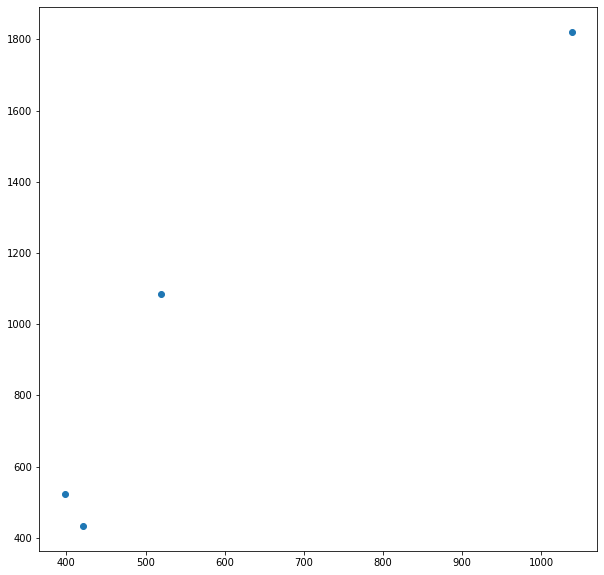

In [233]:
fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(total_volume_prediction, total_volume_gold)
plt.show()